In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/inventory.csv')
df.head(5)

,Title,Author,Genre,Price,Quantity
0,Fill then,Christopher Thompson,Non-fiction,466.01,36
1,Girl,Michael Shelton,Sci-Fi,837.53,27
2,Different listen,Edward Campbell,Fiction,882.77,14
3,Improve brother beautiful,Amanda Harris,AI,474.25,44
4,Environment,Dr. Jose Williams,Horror,187.68,12


In [ ]:
df2=pd.read_csv('/content/sales.csv')
df2.head(5)

,Date,Title,Quantity Sold,Total Revenue
0,2023-01-29,Employee public,10,14169.60
1,2024-07-14,Rise admit section,13,5335.33
2,2022-05-15,Close,2,1096.10
3,2022-08-23,Every shoulder,3,4470.78
4,2024-04-21,You line raise computer,19,4657.47


In [ ]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     200 non-null    object 
 1   Author    200 non-null    object 
 2   Genre     200 non-null    object 
 3   Price     200 non-null    float64
 4   Quantity  200 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           200 non-null    object 
 1   Title          200 non-null    object 
 2   Quantity Sold  200 non-null    int64  
 3   Total Revenue  200 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


In [ ]:
df.describe()


,Price,Quantity
count,200.000000,200.000000
mean,801.068850,24.110000
std,401.690154,14.603913
min,104.850000,1.000000
25%,465.875000,11.000000
50%,796.580000,23.000000
75%,1145.962500,37.000000
max,1492.400000,49.000000


In [ ]:
df2.describe()

,Quantity Sold,Total Revenue
count,200.000000,200.000000
mean,9.955000,7487.433450
std,5.489412,6086.986399
min,1.000000,183.430000
25%,5.000000,2741.585000
50%,10.000000,5837.420000
75%,14.250000,10621.020000
max,19.000000,27479.890000


In [ ]:
df.isnull().sum()

,0
Title,0
Author,0
Genre,0
Price,0
Quantity,0


In [ ]:
df2.isnull().sum()

,0
Date,0
Title,0
Quantity Sold,0
Total Revenue,0


In [ ]:
import pandas as pd

class Bookstore:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
        self.sales = []

    # Add a new book
    def add_book(self, Title, Author, Price, Quantity):
        new_row = {
            "Title": Title,
            "Author": Author,
            "Price": Price,
            "Quantity": Quantity
        }
        self.df = pd.concat([self.df, pd.DataFrame([new_row])], ignore_index=True)
        print(f"Book '{Title}' added.")

    # Update inventory (quantity)
    def update_inventory(self, Title, quantity_change):
        if Title in self.df["Title"].values:
            self.df.loc[self.df["Title"] == Title, "Quantity"] += quantity_change
            print(f"Updated quantity for '{Title}'.")
        else:
            print("Book not found!")

    # Record sales
    def record_sale(self, Title, quantity_sold):
        if Title in self.df["Title"].values:
            stock = int(self.df.loc[self.df["Title"] == Title, "Quantity"].iloc[0])

            if stock >= quantity_sold:
                self.df.loc[self.df["Title"] == Title, "Quantity"] -= quantity_sold
                self.sales.append({"Title": Title, "Quantity Sold": quantity_sold})
                print(f"Sale recorded for '{Title}'.")
            else:
                print("Not enough stock!")
        else:
            print("Book not found!")

    # Generate report
    def generate_report(self):
        display(self.df)
        sales_df = pd.DataFrame(self.sales)
        if len(sales_df) == 0:
            print("No sales yet.")
        else:
            display(sales_df)
        total_books_sold = sum([s["Quantity Sold"] for s in self.sales]) if self.sales else 0
        print(f"\nTotal Books Sold: {total_books_sold}")


In [ ]:
store = Bookstore(df)

store.add_book("Deep Learning", "Andrew", 600, 7)
store.add_book("Python Basics", "Guido van Rossum", 50.0, 10)
store.update_inventory("Python Basics", 5)
store.add_book("AI Intro", "John McCarthy", 75.0, 10)
store.record_sale("AI Intro", 2)
store.record_sale("Python Basics", 3)

store.generate_report()


df = store.df
display(df.tail())

Book 'Deep Learning' added.
Book 'Python Basics' added.
Updated quantity for 'Python Basics'.
Book 'AI Intro' added.
Sale recorded for 'AI Intro'.
Sale recorded for 'Python Basics'.


,Title,Author,Genre,Price,Quantity
0,Fill then,Christopher Thompson,Non-fiction,466.01,36
1,Girl,Michael Shelton,Sci-Fi,837.53,27
2,Different listen,Edward Campbell,Fiction,882.77,14
3,Improve brother beautiful,Amanda Harris,AI,474.25,44
4,Environment,Dr. Jose Williams,Horror,187.68,12
...,...,...,...,...,...
198,How former,Nicole Bowen,AI,440.66,4
199,Thousand former,Brian Larson MD,Sci-Fi,318.93,4
200,Deep Learning,Andrew,NaN,600.00,7
201,Python Basics,Guido van Rossum,NaN,50.00,12


,Title,Quantity Sold
0,AI Intro,2
1,Python Basics,3



Total Books Sold: 5


,Title,Author,Genre,Price,Quantity
198,How former,Nicole Bowen,AI,440.66,4
199,Thousand former,Brian Larson MD,Sci-Fi,318.93,4
200,Deep Learning,Andrew,NaN,600.00,7
201,Python Basics,Guido van Rossum,NaN,50.00,12
202,AI Intro,John McCarthy,NaN,75.00,8


In [ ]:
df.shape

(203, 5)

In [ ]:
df.head()

,Title,Author,Genre,Price,Quantity
0,Fill then,Christopher Thompson,Non-fiction,466.01,36
1,Girl,Michael Shelton,Sci-Fi,837.53,27
2,Different listen,Edward Campbell,Fiction,882.77,14
3,Improve brother beautiful,Amanda Harris,AI,474.25,44
4,Environment,Dr. Jose Williams,Horror,187.68,12


In [ ]:
x=df.groupby('Genre')['Quantity'].sum()
x

,Quantity
Genre,
AI,416
Business,590
Fantasy,390
Fiction,470
Horror,499
Mystery,656
Non-fiction,432
Programming,479
Romance,525


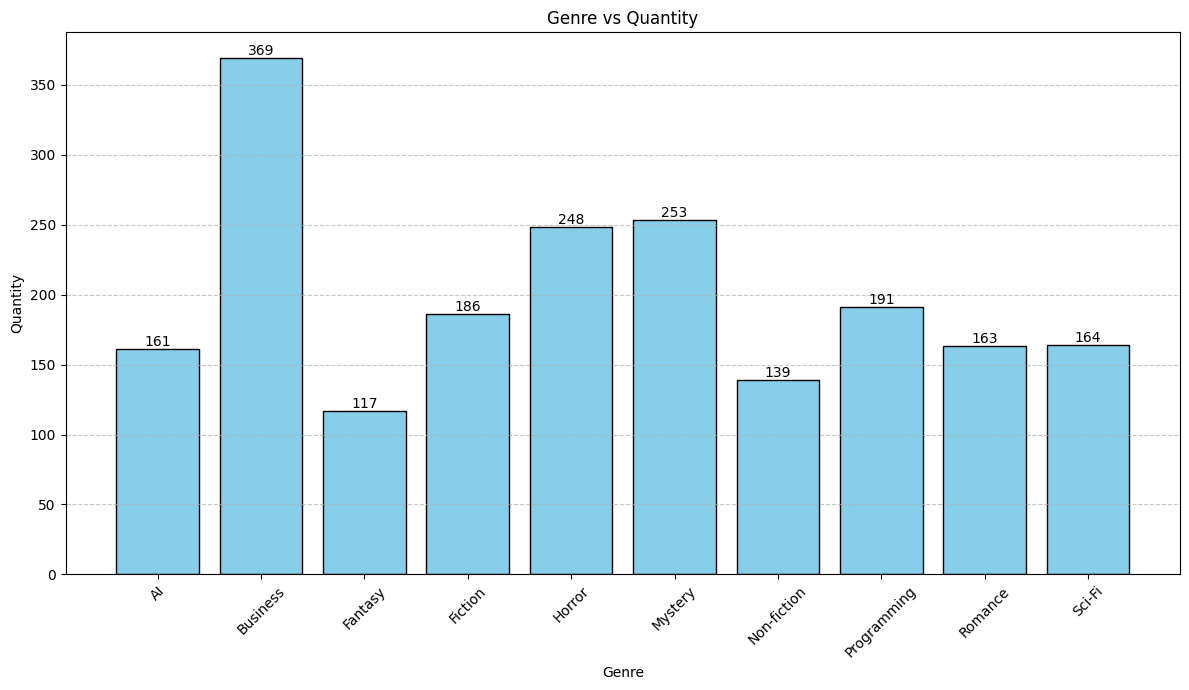

In [ ]:
plt.figure(figsize=(12,7))
bar=plt.bar(x=x.index,height=x.values, color='skyblue', edgecolor='black')
plt.bar_label(bar)
plt.title('Genre vs Quantity')
plt.xlabel('Genre')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
dff = pd.merge(df, df2, on='Title', how='inner')
dff.head()


,Title,Author,Genre,Price,Quantity,Date,Quantity Sold,Total Revenue
0,Environment,Dr. Jose Williams,Horror,187.68,12,2025-10-09,10,1876.80
1,Later fly and,Stacey Wood,Sci-Fi,867.56,40,2025-08-06,1,867.56
2,Follow major little,Brian Clarke,Business,354.98,18,2024-04-12,7,2484.86
3,Follow major little,Brian Clarke,Business,354.98,18,2023-07-23,8,2839.84
4,Follow major little,Brian Clarke,Business,354.98,18,2022-08-09,16,5679.68


In [ ]:
dff.isnull().sum()

,0
Title,0
Author,0
Genre,0
Price,0
Quantity,0
Date,0
Quantity Sold,0
Total Revenue,0


In [ ]:
x = dff.groupby('Genre')['Quantity Sold'].sum()
x

,Quantity Sold
Genre,
AI,161
Business,369
Fantasy,117
Fiction,186
Horror,248
Mystery,253
Non-fiction,139
Programming,191
Romance,163


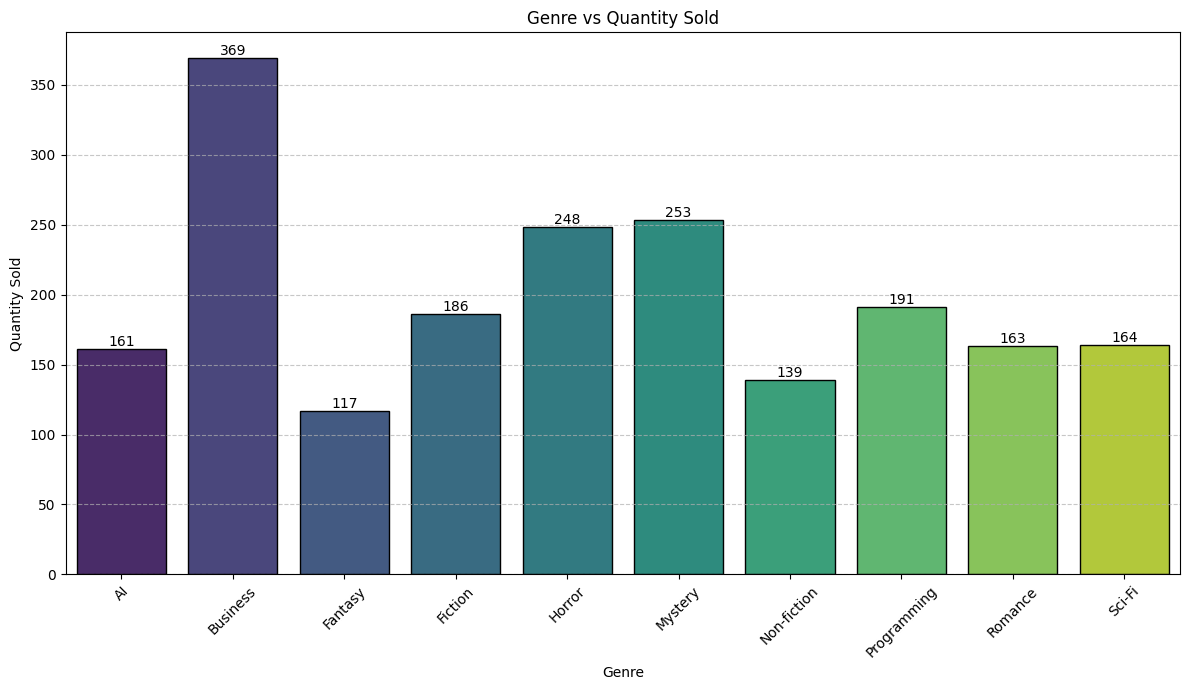

In [ ]:
plt.figure(figsize=(12,7))
x_df = x.reset_index()
y=sns.barplot(data=x_df,x='Genre',y='Quantity Sold', hue='Genre', palette='viridis', edgecolor='black', legend=False)
for i in y.containers:
    y.bar_label(i)
plt.title('Genre vs Quantity Sold')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
v=dff.groupby('Genre',as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
v

,Genre,Total Revenue
1,Business,269764.38
5,Mystery,214528.22
4,Horror,199569.54
0,AI,139609.99
9,Sci-Fi,134650.72
3,Fiction,134629.41
8,Romance,126668.55
7,Programming,102247.72
6,Non-fiction,95006.99
2,Fantasy,80811.17


/tmp/ipython-input-3364220229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=v,x='Genre',y='Total Revenue', palette='viridis', edgecolor='black')


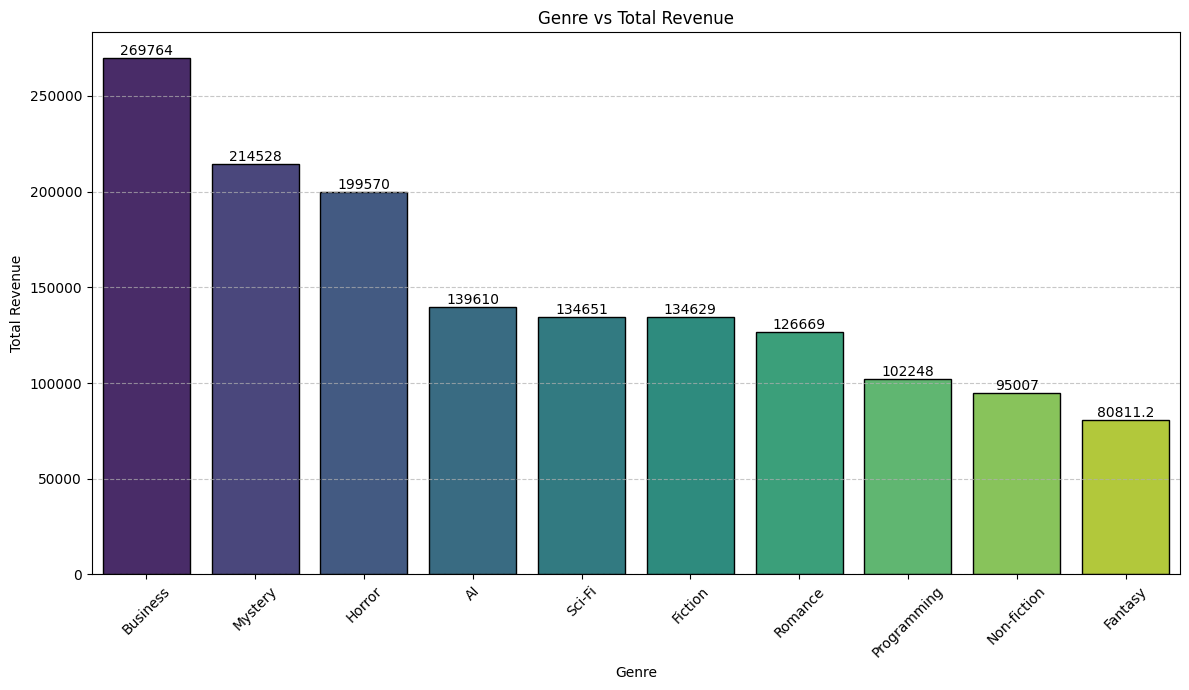

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=v,x='Genre',y='Total Revenue', palette='viridis', edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Genre vs Total Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
x = dff.groupby('Genre')['Quantity Sold'].sum()
x

,Quantity Sold
Genre,
AI,161
Business,369
Fantasy,117
Fiction,186
Horror,248
Mystery,253
Non-fiction,139
Programming,191
Romance,163


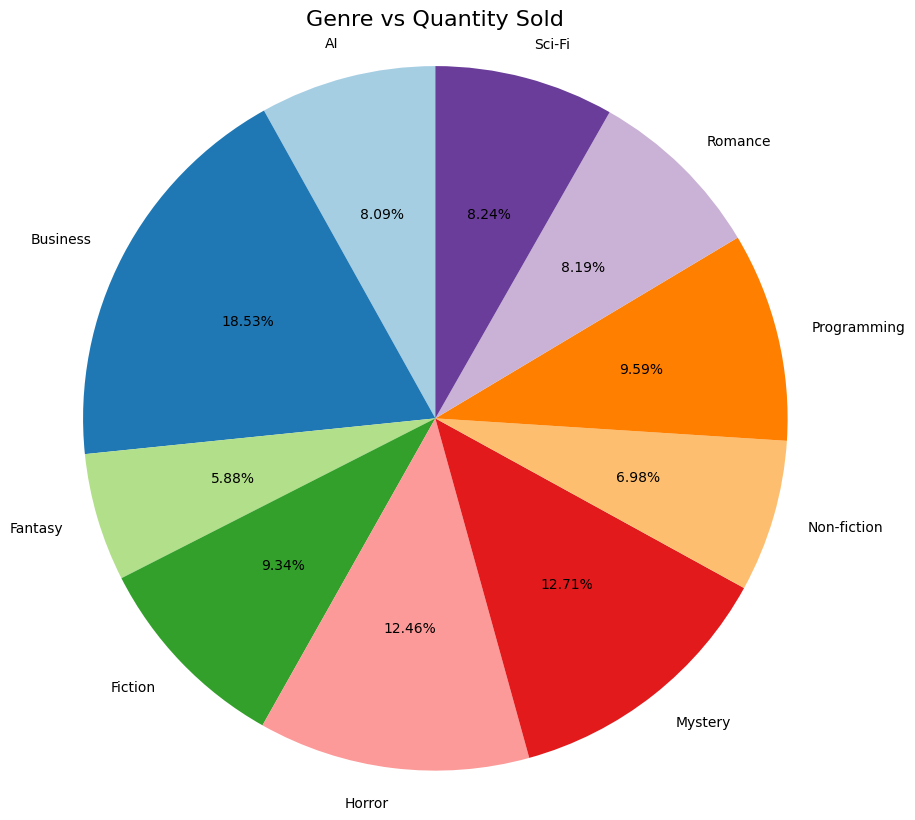

In [ ]:
plt.figure(figsize=(10,10))
colors = plt.cm.Paired.colors
plt.pie(x, labels=x.index, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Genre vs Quantity Sold', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
dff['year']=pd.to_datetime(dff['Date']).dt.year
dff.head()

,Title,Author,Genre,Price,Quantity,Date,Quantity Sold,Total Revenue,year
0,Environment,Dr. Jose Williams,Horror,187.68,12,2025-10-09,10,1876.80,2025
1,Later fly and,Stacey Wood,Sci-Fi,867.56,40,2025-08-06,1,867.56,2025
2,Follow major little,Brian Clarke,Business,354.98,18,2024-04-12,7,2484.86,2024
3,Follow major little,Brian Clarke,Business,354.98,18,2023-07-23,8,2839.84,2023
4,Follow major little,Brian Clarke,Business,354.98,18,2022-08-09,16,5679.68,2022


In [ ]:
dff['year'].unique()

array([2025, 2024, 2023, 2022, 2021], dtype=int32)

In [ ]:
r=dff.groupby('year',as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
r

,year,Total Revenue
3,2024,522500.63
2,2023,425027.63
1,2022,273911.19
4,2025,267880.65
0,2021,8166.59


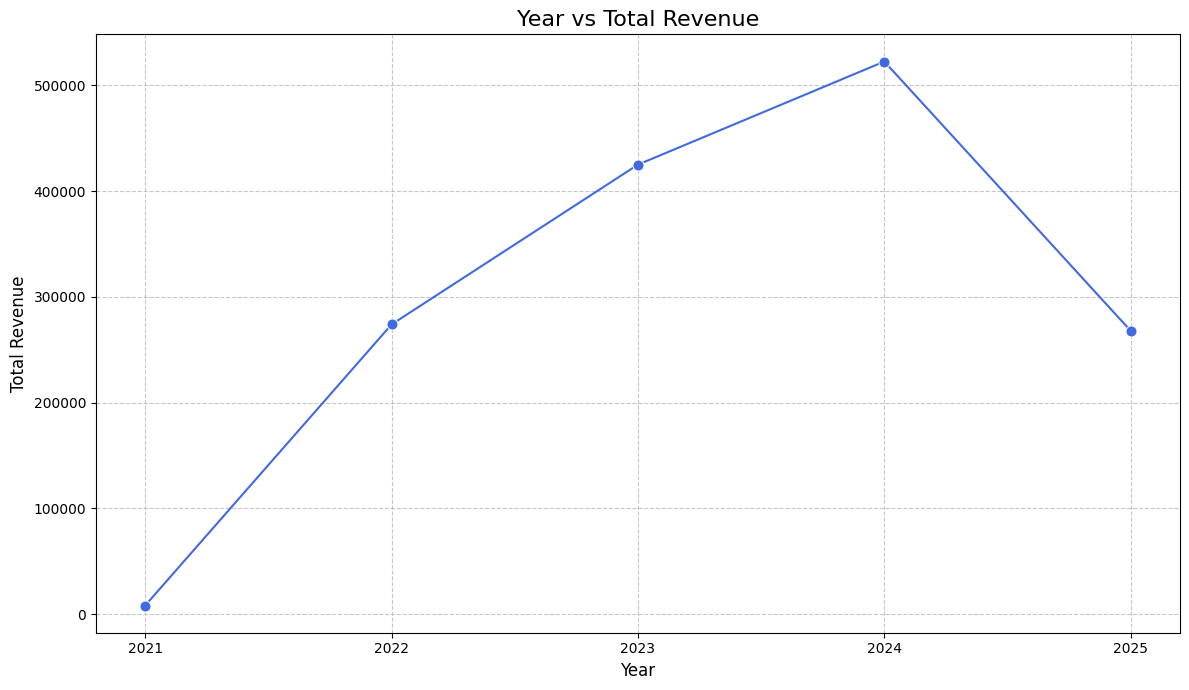

In [ ]:
plt.figure(figsize=(12,7))
ym=sns.lineplot(data=r,x='year',y='Total Revenue', marker='o', color='royalblue', markersize=8)
plt.title('Year vs Total Revenue', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(r['year'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
q=dff.groupby(['year','Genre'],as_index=False)['Quantity Sold'].sum().sort_values(by='Quantity Sold',ascending=False)
q=q[q['year']==2021]
q

,year,Genre,Quantity Sold
0,2021,Horror,17
1,2021,Programming,2


/tmp/ipython-input-3209519825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  j=sns.barplot(data=q,x='Genre',y='Quantity Sold', palette='viridis', edgecolor='black')


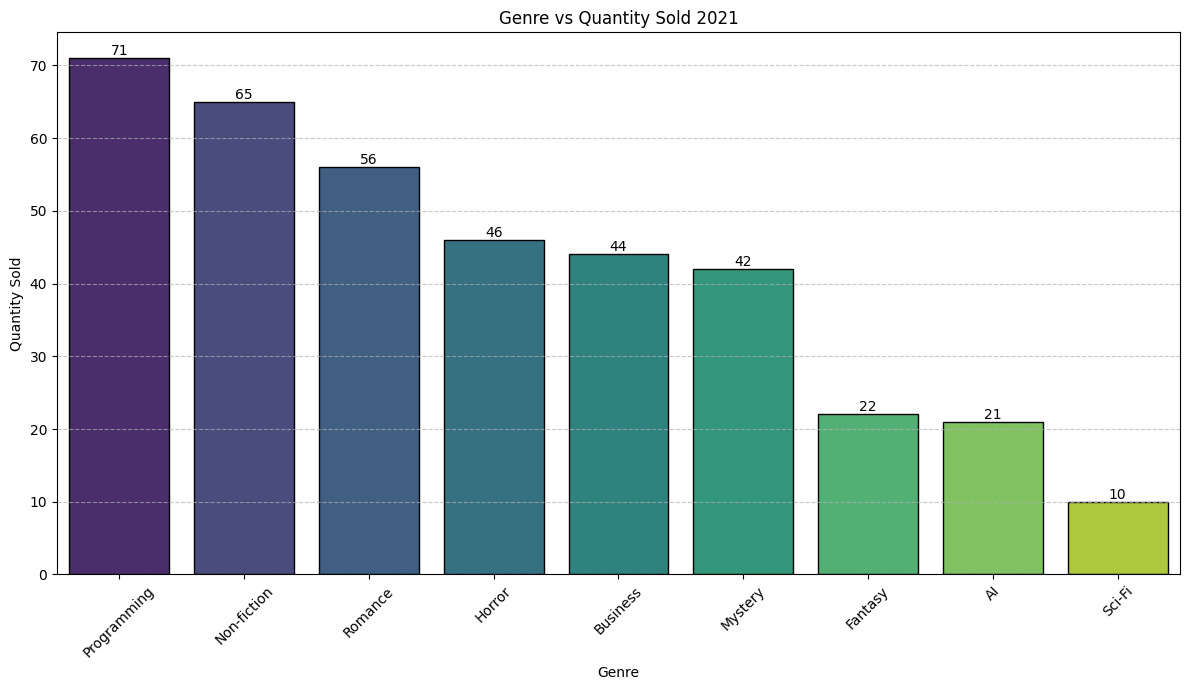

In [ ]:
plt.figure(figsize=(12,7))
j=sns.barplot(data=q,x='Genre',y='Quantity Sold', palette='viridis', edgecolor='black')
for i in j.containers:
    j.bar_label(i)
plt.title('Genre vs Quantity Sold 2021')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-455935254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  k=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette='viridis')


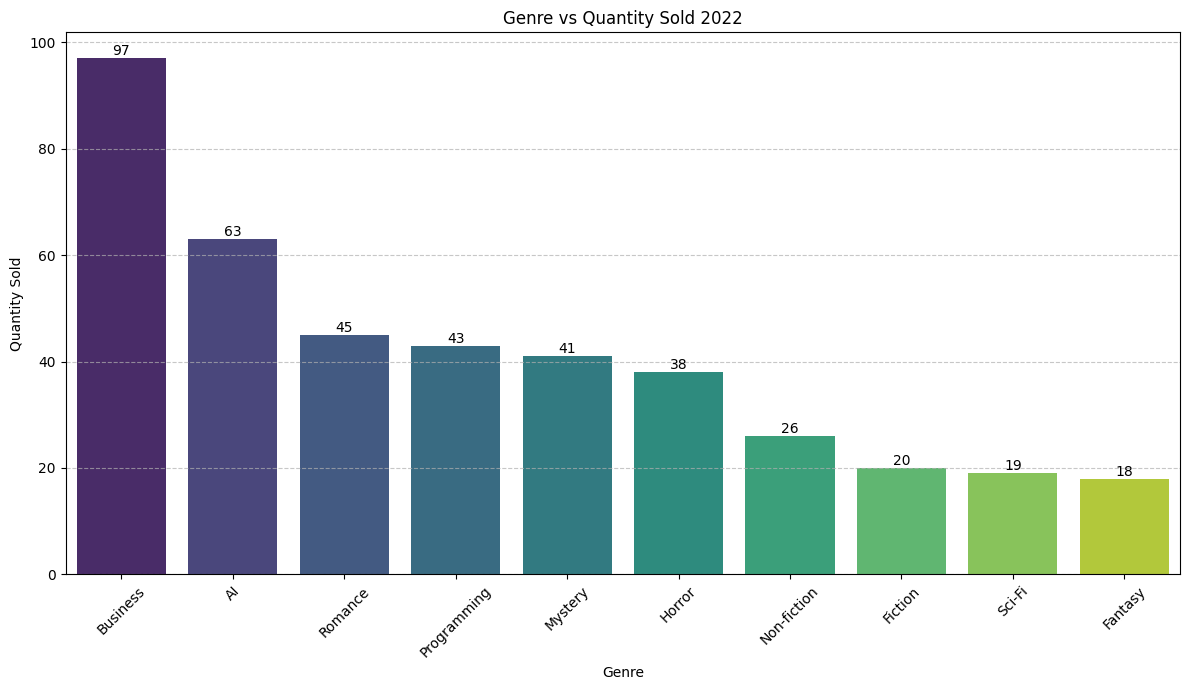

In [ ]:
q=dff.groupby(['year','Genre'],as_index=False)['Quantity Sold'].sum().sort_values(by='Quantity Sold',ascending=False)

q=q[q['year']==2022]
plt.figure(figsize=(12,7))
k=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette='viridis')
for i in k.containers:
    k.bar_label(i)
plt.title('Genre vs Quantity Sold 2022')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2032233657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  l=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette='Set2')


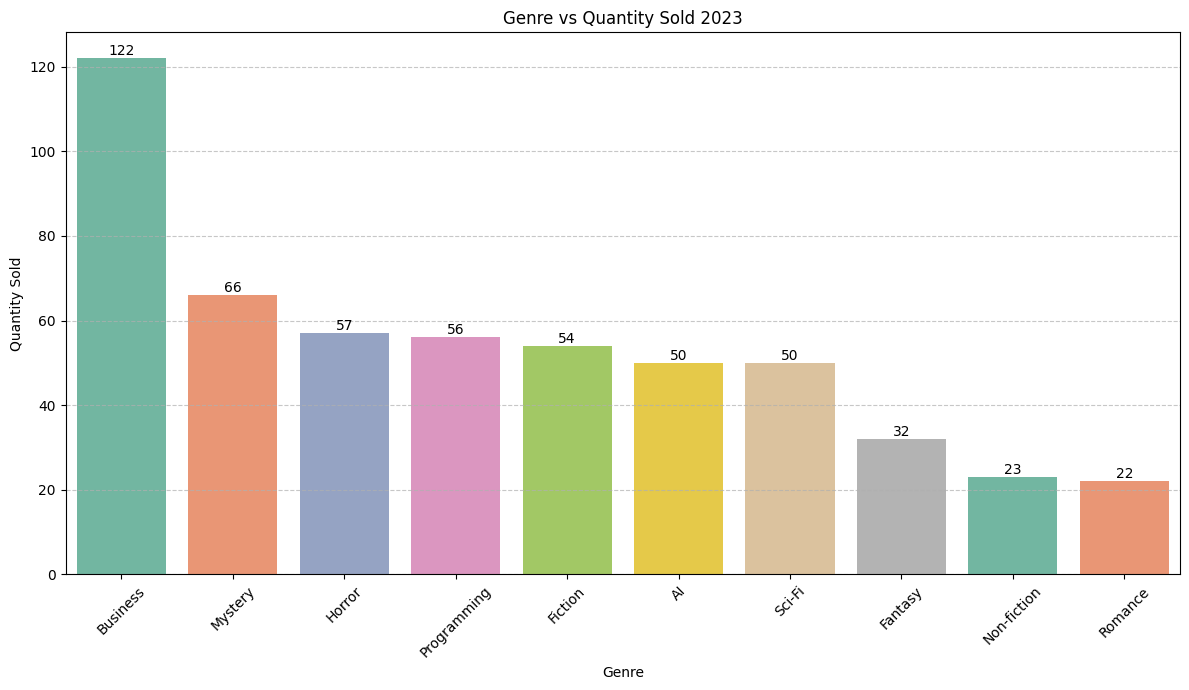

In [ ]:
q=dff.groupby(['year','Genre'],as_index=False)['Quantity Sold'].sum().sort_values(by='Quantity Sold',ascending=False)

q=q[q['year']==2023]
plt.figure(figsize=(12,7))
l=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette='Set2')
for i in l.containers:
    l.bar_label(i)
plt.title('Genre vs Quantity Sold 2023')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2950480249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lk=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette="Set2")


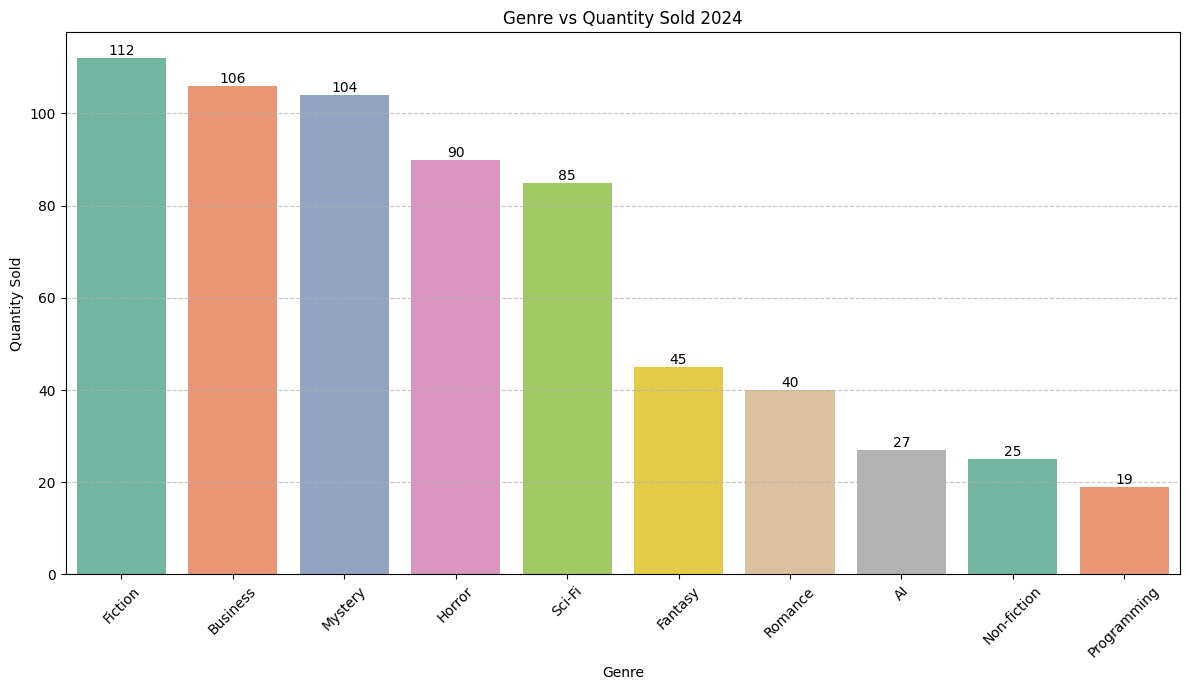

In [ ]:
q=dff.groupby(['year','Genre'],as_index=False)['Quantity Sold'].sum().sort_values(by='Quantity Sold',ascending=False)

q=q[q['year']==2024]
plt.figure(figsize=(12,7))
lk=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette="Set2")
for i in lk.containers:
    lk.bar_label(i)
plt.title('Genre vs Quantity Sold 2024')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4120795360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  lj=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette="viridis")


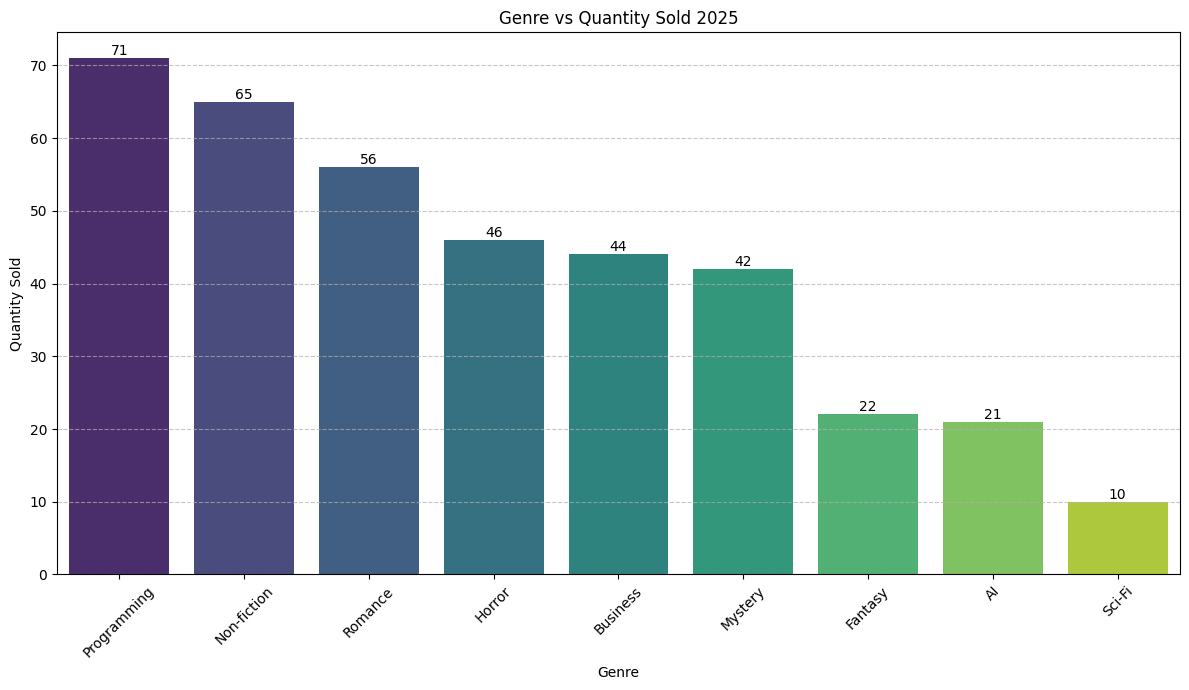

In [ ]:
q=dff.groupby(['year','Genre'],as_index=False)['Quantity Sold'].sum().sort_values(by='Quantity Sold',ascending=False)

q=q[q['year']==2025]
plt.figure(figsize=(12,7))
lj=sns.barplot(data=q,x='Genre',y='Quantity Sold',palette="viridis")
for i in lj.containers:
    lj.bar_label(i)
plt.title('Genre vs Quantity Sold 2025')
plt.xlabel('Genre')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
yer=dff.groupby('year',as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
yer

,year,Total Revenue
3,2024,522500.63
2,2023,425027.63
1,2022,273911.19
4,2025,267880.65
0,2021,8166.59


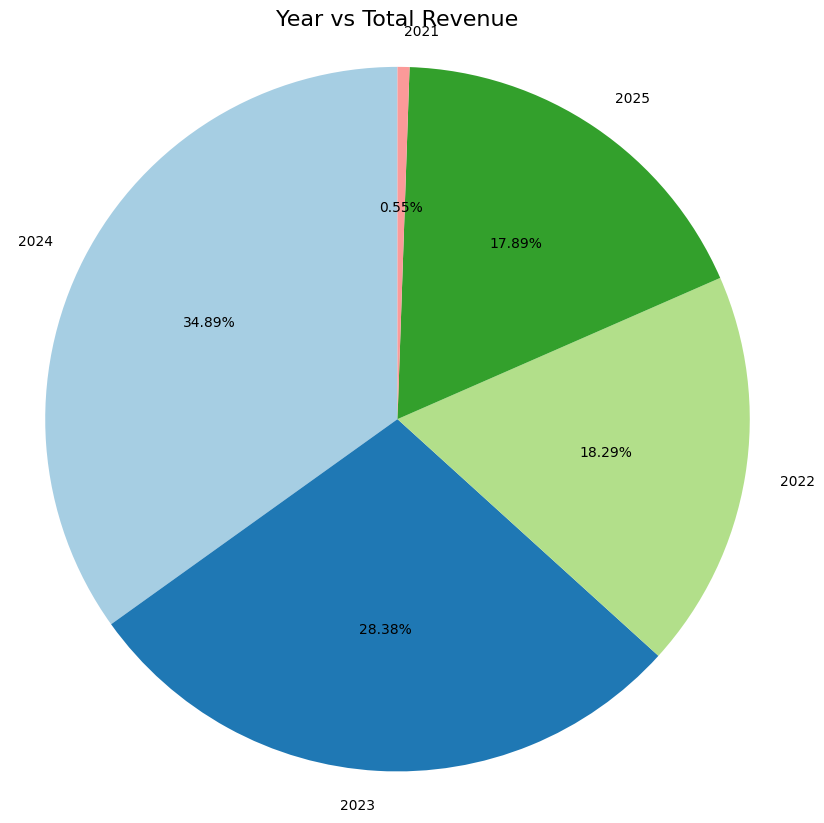

In [ ]:
plt.figure(figsize=(10,10))
colors = plt.cm.Paired.colors
plt.pie(yer['Total Revenue'],labels=yer['year'],autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Year vs Total Revenue', fontsize=16)
plt.axis('equal')
plt.show()

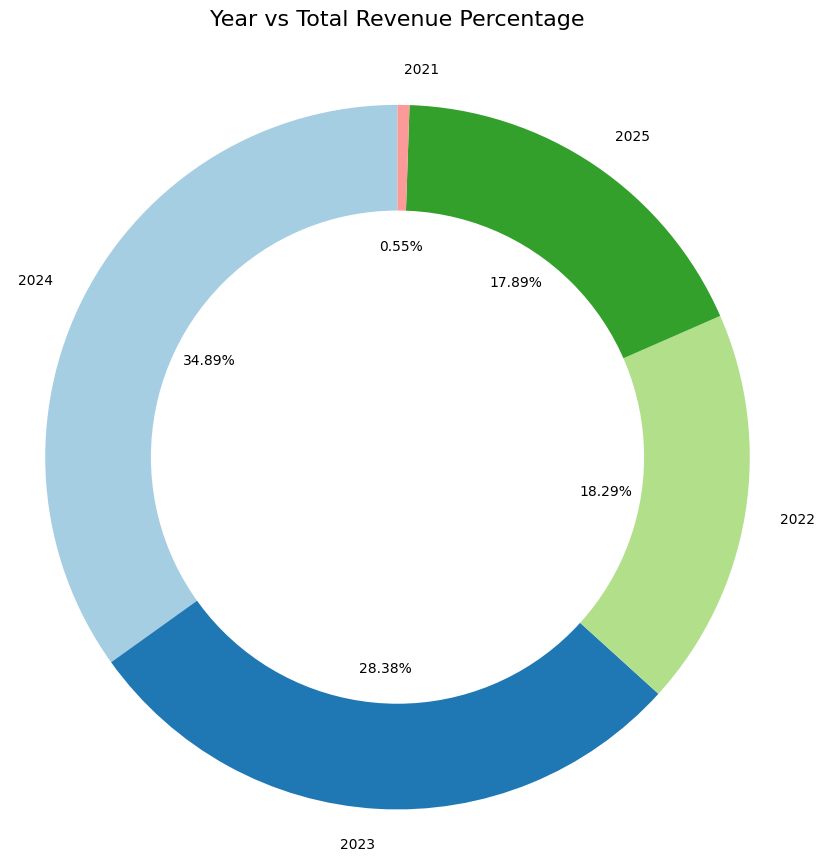

In [ ]:
plt.figure(figsize=(10,10))
colors = plt.cm.Paired.colors
plt.pie(yer['Total Revenue'], labels=yer['year'], autopct='%1.2f%%', startangle=90, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Year vs Total Revenue Percentage', fontsize=16,y=1.05)
plt.axis('equal')
plt.show()

In [ ]:
line=dff.groupby(['year','Genre'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
line

,year,Genre,Total Revenue
25,2024,Fiction,91787.30
13,2023,Business,91145.82
27,2024,Mystery,89416.98
26,2024,Horror,87669.74
23,2024,Business,72157.23
31,2024,Sci-Fi,67419.79
12,2023,AI,60909.94
3,2022,Business,57953.61
17,2023,Mystery,54110.86
38,2025,Programming,51513.68


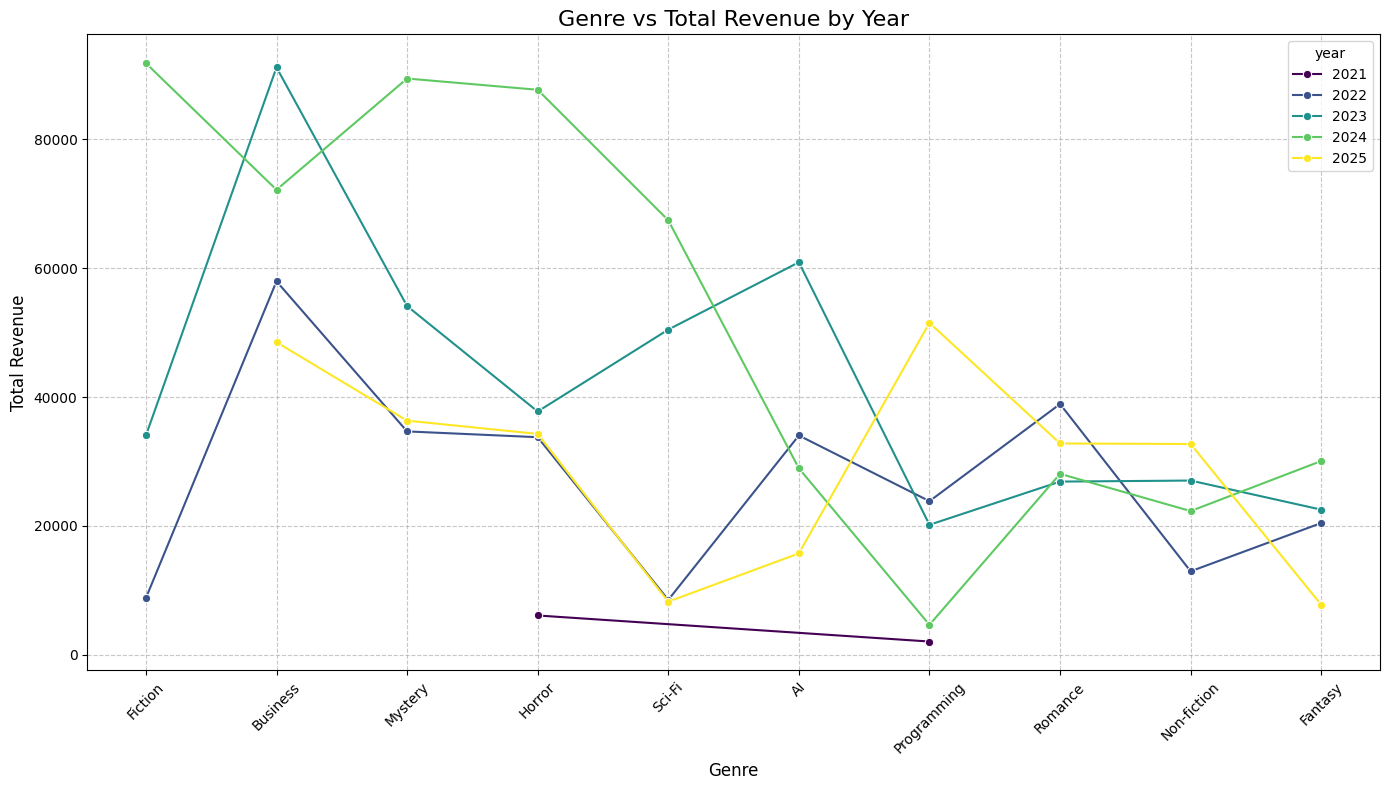

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data=line,x='Genre',y='Total Revenue',hue='year', marker='o', palette='viridis')
plt.title('Genre vs Total Revenue by Year', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()